In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('housing.csv')

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: ylabel='Count'>

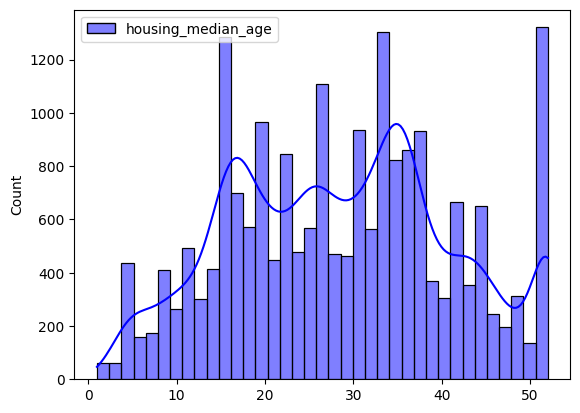

In [9]:
sns.histplot([df["housing_median_age"]] , kde=True , palette= ["blue"])

<Axes: ylabel='Count'>

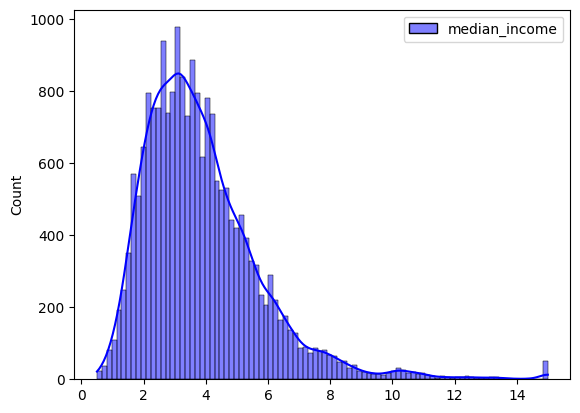

In [10]:
sns.histplot([df["median_income"]] , kde=True , palette= ["blue"])

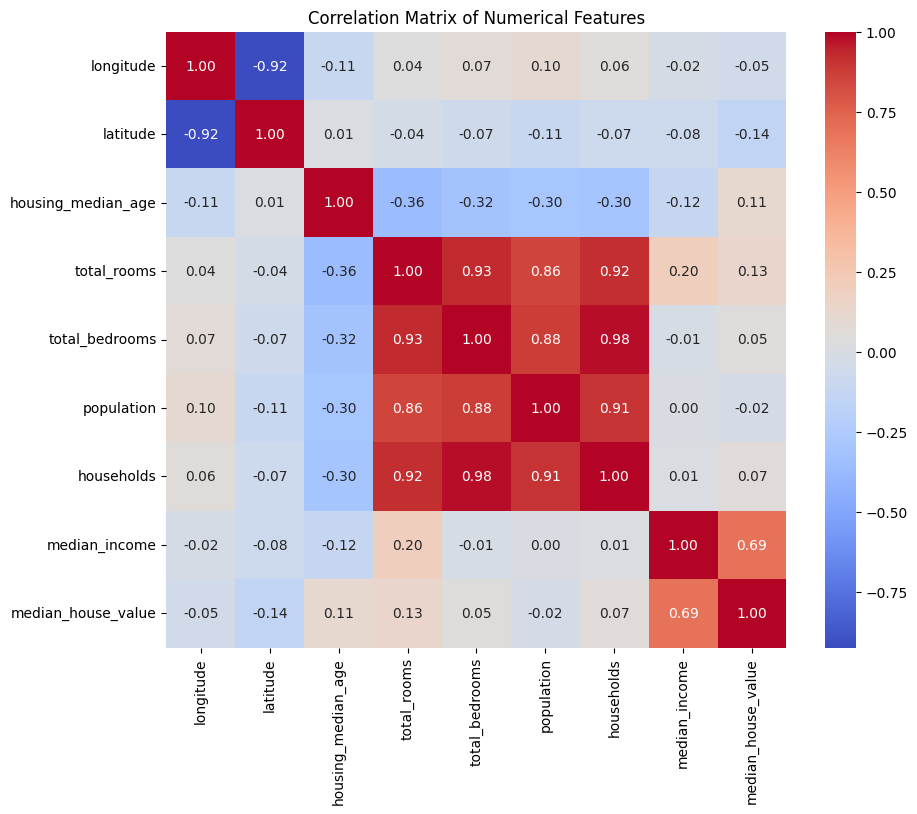

In [23]:
import matplotlib.pyplot as plt

df_numeric = df.drop(columns=['ocean_proximity'])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [26]:
df.shape

(20640, 10)

In [28]:
df["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [29]:
label_encoder = LabelEncoder()
df['ocean_proximity_encoded'] = label_encoder.fit_transform(df['ocean_proximity'])
count_ecoded = df["ocean_proximity_encoded"].value_counts()
print(count_ecoded)

ocean_proximity_encoded
0    9136
1    6551
4    2658
3    2290
2       5
Name: count, dtype: int64


In [32]:
null = df.isnull().sum()
null

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [36]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [41]:
df = df.drop(["ocean_proximity"], axis = 1 , inplace = True)
df = df.fillna(df.mean())

KeyError: "['ocean_proximity'] not found in axis"

In [42]:
df = df.fillna(df.mean())
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity_encoded,0


In [43]:
x = df.drop(["median_house_value"] , axis = 1)
y = df["median_house_value"]

In [44]:
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
x = data_scaler.fit_transform(x)
x

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  1.2910888 ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.2910888 ],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.2910888 ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.11673923],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -0.11673923],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -0.11673923]])

In [45]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)
model = LinearRegression()
model.fit(x_train , y_train)


LinearRegression()

In [48]:
y_train_pred = model.predict(x_train)
mse_train_before = mean_squared_error(y_train , y_train_pred )
r2_train_before = r2_score(y_train , y_train_pred)
print(mse_train_before)
print(r2_train_before)

4810958229.787787
0.6401079709888613


In [49]:
y_test_pred = model.predict(x_test)
mse_test_before = mean_squared_error(y_test , y_test_pred )
r2_test_before = r2_score(y_test , y_test_pred)
print(mse_test_before)
print(r2_test_before)

5055025116.165613
0.6142406531011786


In [53]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly_features = PolynomialFeatures(degree = degree)
x_poly = poly_features.fit_transform(x)
x_poly.shape


(20640, 55)

In [54]:
x_train , x_test , y_train , y_test = train_test = train_test_split(x_poly , y , test_size = 0.2 , random_state = 42)

In [55]:
model_poly = LinearRegression()
model_poly.fit(x_train , y_train)

LinearRegression()

In [60]:
 y_train_pred = model_poly.predict(x_train)
 mse_train = mean_squared_error(y_train , y_train_pred)
 r2_train = r2_score(y_train , y_train_pred)
 print(mse_train)
 print(r2_train)

3924534103.312224
0.7064184568015366


In [63]:
y_test_pred = model_poly.predict(x_test)
mse_test = mean_squared_error(y_test , y_test_pred)
r2_test = r2_score(y_test , y_test_pred)
print(mse_test)
print(r2_test)

4539612253.509446
0.6535728670293875


# with feature extraction

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [67]:
x = df.drop(["median_house_value"] , axis = 1)
y = df["median_house_value"]

In [68]:
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
x = data_scaler.fit_transform(x)

In [69]:
pca = PCA(n_components=6)
x_pca = pca.fit_transform(x)

In [70]:
x_train , x_test , y_train , y_test = train_test_split(x_pca , y , test_size = 0.2 , random_state = 42)

In [71]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [72]:
y_test_pred = model.predict(x_train)
mse_train = mean_squared_error(y_train , y_train_pred)
r2_train = r2_score(y_train , y_train_pred)

In [73]:
print(mse_train)
print(r2_train)

3924534103.312224
0.7064184568015366


In [75]:
y_test_pred = model.predict(x_test)
mse_test = mean_squared_error(y_test , y_test_pred)
r2_test = r2_score(y_test , y_test_pred)

In [76]:
mse_test

6207126102.373473

In [77]:
r2_test

0.5263214610521096